WAVELET HALO V vs VdelE




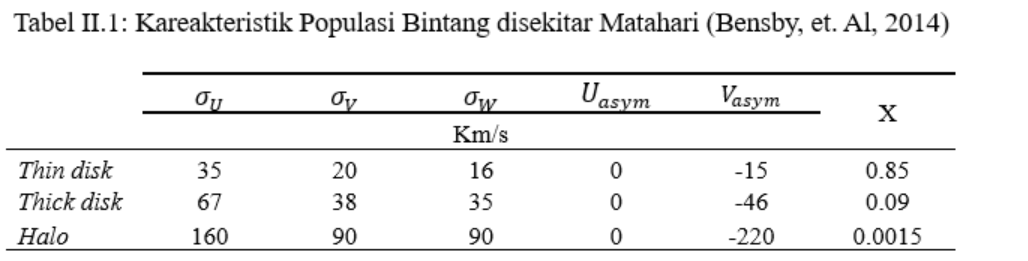

In [1]:
'''0. Import Library phyton'''
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
'''1. BACA DATA HALO'''
#U,V,W, VdelE koreksi LSR
u, v, w, vdele = np.loadtxt("thin.csv", delimiter=",", usecols=(47,48,49,52), skiprows=1, unpack=True)
#47 = U koreksi LSR
#48 = V koreksi LSR
#49 = W koreksi LSR
#52 = VdelE koreksi LSR

In [3]:
'''2. SCATTER PLOT DATA HALO
# Scatter plot V vs VdelE
plt.figure(dpi=200, figsize=(12,18))
plt.subplot(321)
plt.scatter(v,vdele,s=3)
plt.xlabel('V (km/s)',fontsize=12)
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)',fontsize=12)
plt.title('Halo')
plt.savefig('HaloScatterVVdelE.png')

# Scatter plot U vs V
plt.figure(dpi=200, figsize=(12,18))
plt.subplot(321)
plt.scatter(u,v,s=3)
plt.xlabel('U (km/s)',fontsize=12)
plt.ylabel('V (km/s)',fontsize=12)
plt.title('Halo')
plt.savefig('HaloScatterUV.png')'''

"2. SCATTER PLOT DATA HALO\n# Scatter plot V vs VdelE\nplt.figure(dpi=200, figsize=(12,18))\nplt.subplot(321)\nplt.scatter(v,vdele,s=3)\nplt.xlabel('V (km/s)',fontsize=12)\nplt.ylabel(r'$\\sqrt{U^2+2V^2}$ (km/s)',fontsize=12)\nplt.title('Halo')\nplt.savefig('HaloScatterVVdelE.png')\n\n# Scatter plot U vs V\nplt.figure(dpi=200, figsize=(12,18))\nplt.subplot(321)\nplt.scatter(u,v,s=3)\nplt.xlabel('U (km/s)',fontsize=12)\nplt.ylabel('V (km/s)',fontsize=12)\nplt.title('Halo')\nplt.savefig('HaloScatterUV.png')"

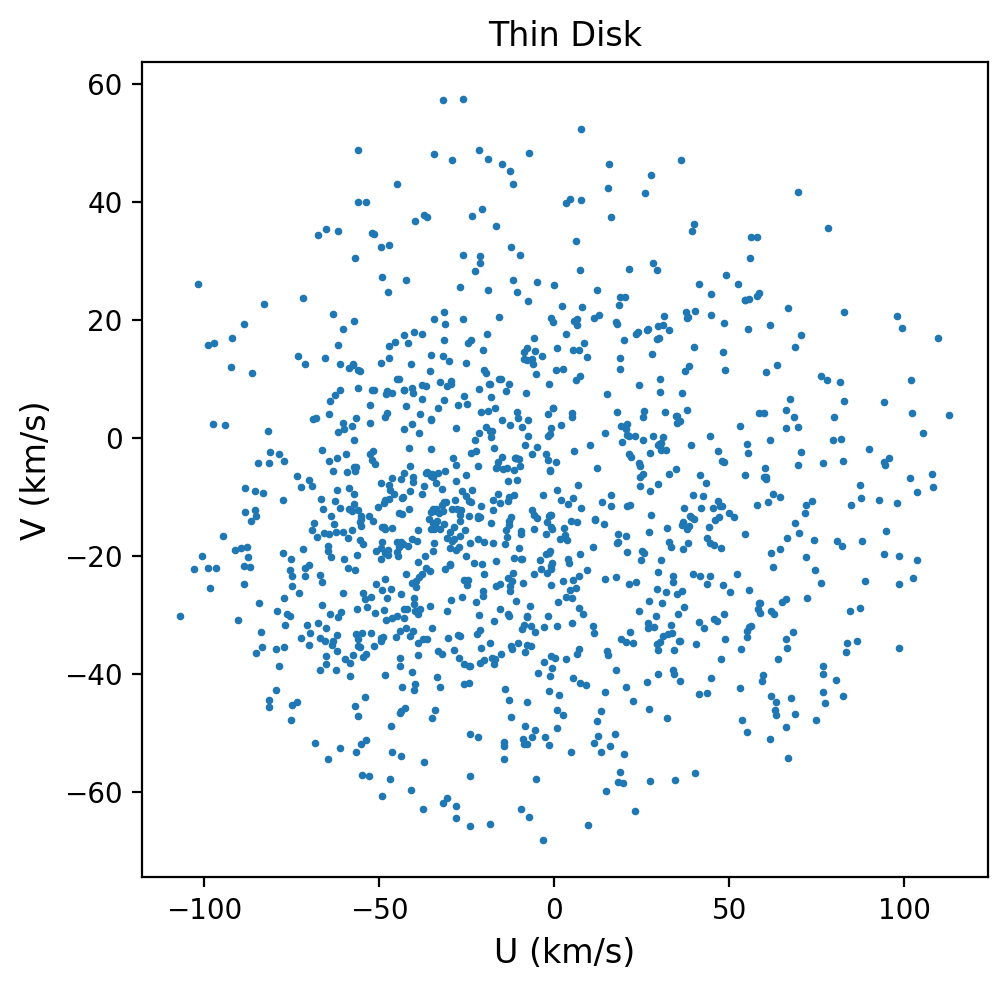

In [4]:
'''2. SCATTER PLOT DATA THIN DISK
#Scatter plot V vs VdelE
plt.figure(dpi=200, figsize=(12,18))
plt.subplot(321)
plt.scatter(v,vdele,s=3)
plt.xlabel('V (km/s)',fontsize=12)
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)',fontsize=12)
plt.title('Thin Disk')
plt.savefig('THINScatterVVdelE.png')
'''
# Scatter plot U vs V
plt.figure(dpi=200, figsize=(12,18))
plt.subplot(321)
plt.scatter(u,v,s=3)
plt.xlabel('U (km/s)',fontsize=12)
plt.ylabel('V (km/s)',fontsize=12)
plt.title('Thin Disk')
plt.savefig('THINScatterUV.png')

In [5]:
'''2. SIMULASI MONTE CARLO 5 KALI'''
# Monte Carlo
u_mc = [[] for i in range (5)]
v_mc = [[] for i in range (5)]
w_mc = [[] for i in range (5)]
vdele_mc = [[] for i in range (5)]

# Input parameter di Halo, ini udah koreksi LSR
for i in range (5):
    ''''u_mc[i] = np.random.normal(0, 160, len(u)) #input :U,dispersi U,jumlah bintang halo
    v_mc[i] = np.random.normal(-220, 90, len(v))
    w_mc[i] = np.random.normal(0, 90, len(w))'''
    u_mc[i] = np.random.normal(0, 35, len(u)) #input :U,dispersi U,jumlah bintang thin
    v_mc[i] = np.random.normal(-15, 20, len(v))
    w_mc[i] = np.random.normal(0, 16, len(w))
    #menghitung vdele yang sebanding dengan eksentrisitas
    vdele_mc[i] = np.power((np.power(u_mc[i],2) + 2*np.power(v_mc[i],2)),0.5)

In [6]:
'''MENDEFINISIKAN WAVELET'''
#Mendefinisikan fungsi maxican hat
def mexico (rr, scale):
    return (2 - rr**2 / (scale**2)) * np.exp(-rr**2 / (2*scale**2))
#Mendefinisikan koefisien wavelet
def koefisien (xstart, xend, ystart, yend, dx, dy, x, y, a):
    xgrid = np.arange(xstart, xend, dx)
    ygrid = np.arange(ystart, yend, dy)
    nxgrid= len(xgrid)
    nygrid= len(ygrid)
    coef = np.zeros((nxgrid, nygrid))
    #membaca setiap pixel
    for i in range (len(x)-1):
        for p in range (nxgrid):
            for q in range (nygrid):
                xx = xgrid[p] - x[i]
                yy = ygrid[q] - y[i]
                r = np.sqrt(xx*xx + yy*yy)
                coef[q][p] += mexico(r, a)
    #me-nol-kan nilai wavelet yang negatif
    coef[coef<0]=0
    return coef

In [7]:
'''3. MENDEFINISIKAN WAVELET KOEFISISEN MC SAJA'''
def KOEFMC (xstart, xend, ystart, yend, dx, dy, x_mc, y_mc, a):
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    return wmc

In [8]:
'''4. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 0'''
def SIGNAL0 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):
    #data
    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    #mengurangi wavelet
    wavelet = w-wmc
    #me-nol-kan nilai wavelet yang negatif
    wavelet[wavelet<0] = 0
    #signifikan signal
    sig = wavelet/np.std(wmc)
    #signifikan signal >0
    sig[sig<0] = 0
    return sig

In [9]:
'''5. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 1'''
def SIGNAL1 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):
    #data
    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    #mengurangi wavelet
    wavelet = w-wmc
    #me-nol-kan nilai wavelet yang negatif
    wavelet[wavelet<0] = 0
    #signifikan signal
    sig = wavelet/np.std(wmc)
    #signifikan signal >1
    sig[sig<1] = 0
    return sig

In [10]:
'''6. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 2'''
def SIGNAL2 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):
    #data
    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    #mengurangi wavelet
    wavelet = w-wmc
    #me-nol-kan nilai wavelet yang negatif
    wavelet[wavelet<0] = 0
    #signifikan signal
    sig = wavelet/np.std(wmc)
    #signifikan signal >2
    sig[sig<2] = 0
    return sig

In [11]:
'''7. MENDEFINISIKAN WAVELET SIGNIFIKAN SIGNAL 3'''
def SIGNAL3 (xstart, xend, ystart, yend, dx, dy, x, y, x_mc, y_mc, a):
    #data
    w = koefisien(xstart, xend, ystart, yend, dx, dy, x, y, a)
    #monte carlo 5 kali
    wmc1= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[0], y_mc[0], a)
    wmc2= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[1], y_mc[1], a)
    wmc3= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[2], y_mc[2], a)
    wmc4= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[3], y_mc[3], a)
    wmc5= koefisien(xstart, xend, ystart, yend, dx, dy, x_mc[4], y_mc[4], a)
    #monte carlo rata-rata
    wmc = (np.array(wmc1) + np.array(wmc2) +
                np.array(wmc3) + np.array(wmc4) +
                np.array(wmc5))/5
    #mengurangi wavelet
    wavelet = w-wmc
    #me-nol-kan nilai wavelet yang negatif
    wavelet[wavelet<0] = 0
    #signifikan signal
    sig = wavelet/np.std(wmc)
    #signifikan signal >3
    sig[sig<3] = 0
    return sig

In [12]:
'''PARAMETER ALL HALO
start_time = time.time()

xgrid = np.arange(-300,300,6)
ygrid = np.arange(0,600,6)
X, Y = np.meshgrid(xgrid, ygrid)

xgrid1 = np.arange(-300,300,6)
ygrid1 = np.arange(0,600,6)
X1, Y1 = np.meshgrid(xgrid1, ygrid1)

xgrid = np.arange(-300,300,6)
ygrid = np.arange(-300,300,6)
X, Y = np.meshgrid(xgrid, ygrid)

xgrid1 = np.arange(-300,300,6)
ygrid1 = np.arange(-300,300,6)
X1, Y1 = np.meshgrid(xgrid1, ygrid1)


# Parameter KOEF MC
M2 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,2)
M4 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,4)
M6 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,6)
M8 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,8)
M10 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,10)
M12 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,12)

# Parameter KOEF MC
M2 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,2)
M4 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,4)
M6 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,6)
M8 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,8)
M10 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,10)
M12 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,12)

# Parameter SIGNIFIKAN SIGNAL 0
S02 = SIGNAL0(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,2)
S04 = SIGNAL0(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,4)
S06 = SIGNAL0(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,6)
S08 = SIGNAL0(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,8)
S010 = SIGNAL0(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,10)
S012 = SIGNAL0(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,12)

# Parameter SIGNIFIKAN SIGNAL 0
S02 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)
S04 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)
S06 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)
S08 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)
S010 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)
S012 = SIGNAL0(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)

# Parameter SIGNIFIKAN SIGNAL 1
S12 = SIGNAL1(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,2)
S14 = SIGNAL1(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,4)
S16 = SIGNAL1(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,6)
S18 = SIGNAL1(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,8)
S110 = SIGNAL1(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,10)
S112 = SIGNAL1(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,12)

# Parameter SIGNIFIKAN SIGNAL 1
S12 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)
S14 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)
S16 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)
S18 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)
S110 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)
S112 = SIGNAL1(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)

# Parameter SIGNIFIKAN SIGNAL 2
S22 = SIGNAL2(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,2)
S24 = SIGNAL2(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,4)
S26 = SIGNAL2(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,6)
S28 = SIGNAL2(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,8)
S210 = SIGNAL2(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,10)
S212 = SIGNAL2(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,12)

# Parameter SIGNIFIKAN SIGNAL 2
S22 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)
S24 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)
S26 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)
S28 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)
S210 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)
S212 = SIGNAL2(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)

# Parameter SIGNIFIKAN SIGNAL 3
S32 = SIGNAL3(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,2)
S34 = SIGNAL3(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,4)
S36 = SIGNAL3(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,6)
S38 = SIGNAL3(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,8)
S310 = SIGNAL3(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,10)
S312 = SIGNAL3(-300,300,0,600,6,6,v,vdele,v_mc,vdele_mc,12)

# Parameter SIGNIFIKAN SIGNAL 3
S32 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,2)
S34 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,4)
S36 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,6)
S38 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,8)
S310 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,10)
S312 = SIGNAL3(-300,300,-300,300,6,6,u,v,u_mc,v_mc,12)'''

'PARAMETER ALL HALO\nstart_time = time.time()\n\nxgrid = np.arange(-300,300,6)\nygrid = np.arange(0,600,6)\nX, Y = np.meshgrid(xgrid, ygrid)\n\nxgrid1 = np.arange(-300,300,6)\nygrid1 = np.arange(0,600,6)\nX1, Y1 = np.meshgrid(xgrid1, ygrid1)\n\nxgrid = np.arange(-300,300,6)\nygrid = np.arange(-300,300,6)\nX, Y = np.meshgrid(xgrid, ygrid)\n\nxgrid1 = np.arange(-300,300,6)\nygrid1 = np.arange(-300,300,6)\nX1, Y1 = np.meshgrid(xgrid1, ygrid1)\n\n\n# Parameter KOEF MC\nM2 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,2)\nM4 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,4)\nM6 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,6)\nM8 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,8)\nM10 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,10)\nM12 = KOEFMC(-300,300,0,600,6,6,v_mc,vdele_mc,12)\n\n# Parameter KOEF MC\nM2 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,2)\nM4 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,4)\nM6 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,6)\nM8 = KOEFMC(-300,300,-300,300,6,6,u_mc,v_mc,8)\nM10 = KOEFMC(-300

In [13]:
'''PARAMETER ALL THIN DISK'''
start_time = time.time()
'''
xgrid = np.arange(-60,40,1)
ygrid = np.arange(0,100,1)
X, Y = np.meshgrid(xgrid, ygrid)

xgrid1 = np.arange(-60,40,1)
ygrid1 = np.arange(0,100,1)
X1, Y1 = np.meshgrid(xgrid1, ygrid1)
'''
xgrid = np.arange(-100,100,2)
ygrid = np.arange(-100,100,2)
X, Y = np.meshgrid(xgrid, ygrid)

xgrid1 = np.arange(-100,100,2)
ygrid1 = np.arange(-100,100,2)
X1, Y1 = np.meshgrid(xgrid1, ygrid1)

'''
# Parameter KOEF MC
M2 = KOEFMC(-60,40,0,100,1,1,v_mc,vdele_mc,2)
M4 = KOEFMC(-60,40,0,100,1,1,v_mc,vdele_mc,4)
M6 = KOEFMC(-60,40,0,100,1,1,v_mc,vdele_mc,6)
M8 = KOEFMC(-60,40,0,100,1,1,v_mc,vdele_mc,8)
M10 = KOEFMC(-60,40,0,100,1,1,v_mc,vdele_mc,10)
M12 = KOEFMC(-60,40,0,100,1,1,v_mc,vdele_mc,12)

'''
# Parameter KOEF MC
M2 = KOEFMC(-100,100,-100,100,2,2,u_mc,v_mc,2)
M4 = KOEFMC(-100,100,-100,100,2,2,u_mc,v_mc,4)
M6 = KOEFMC(-100,100,-100,100,2,2,u_mc,v_mc,6)
M8 = KOEFMC(-100,100,-100,100,2,2,u_mc,v_mc,8)
M10 = KOEFMC(-100,100,-100,100,2,2,u_mc,v_mc,10)
M12 = KOEFMC(-100,100,-100,100,2,2,u_mc,v_mc,12)
'''

# Parameter SIGNIFIKAN SIGNAL 0
S02 = SIGNAL0(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,2)
S04 = SIGNAL0(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,4)
S06 = SIGNAL0(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,6)
S08 = SIGNAL0(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,8)
S010 = SIGNAL0(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,10)
S012 = SIGNAL0(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,12)

'''
# Parameter SIGNIFIKAN SIGNAL 0
S02 = SIGNAL0(-100,100,-100,100,2,2,u,v,u_mc,v_mc,2)
S04 = SIGNAL0(-100,100,-100,100,2,2,u,v,u_mc,v_mc,4)
S06 = SIGNAL0(-100,100,-100,100,2,2,u,v,u_mc,v_mc,6)
S08 = SIGNAL0(-100,100,-100,100,2,2,u,v,u_mc,v_mc,8)
S010 = SIGNAL0(-100,100,-100,100,2,2,u,v,u_mc,v_mc,10)
S012 = SIGNAL0(-100,100,-100,100,2,2,u,v,u_mc,v_mc,12)
'''

# Parameter SIGNIFIKAN SIGNAL 1
S12 = SIGNAL1(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,2)
S14 = SIGNAL1(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,4)
S16 = SIGNAL1(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,6)
S18 = SIGNAL1(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,8)
S110 = SIGNAL1(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,10)
S112 = SIGNAL1(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,12)

'''
# Parameter SIGNIFIKAN SIGNAL 1
S12 = SIGNAL1(-100,100,-100,100,2,2,u,v,u_mc,v_mc,2)
S14 = SIGNAL1(-100,100,-100,100,2,2,u,v,u_mc,v_mc,4)
S16 = SIGNAL1(-100,100,-100,100,2,2,u,v,u_mc,v_mc,6)
S18 = SIGNAL1(-100,100,-100,100,2,2,u,v,u_mc,v_mc,8)
S110 = SIGNAL1(-100,100,-100,100,2,2,u,v,u_mc,v_mc,10)
S112 = SIGNAL1(-100,100,-100,100,2,2,u,v,u_mc,v_mc,12)
'''

# Parameter SIGNIFIKAN SIGNAL 2
S22 = SIGNAL2(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,2)
S24 = SIGNAL2(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,4)
S26 = SIGNAL2(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,6)
S28 = SIGNAL2(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,8)
S210 = SIGNAL2(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,10)
S212 = SIGNAL2(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,12)

'''
# Parameter SIGNIFIKAN SIGNAL 2
S22 = SIGNAL2(-100,100,-100,100,2,2,u,v,u_mc,v_mc,2)
S24 = SIGNAL2(-100,100,-100,100,2,2,u,v,u_mc,v_mc,4)
S26 = SIGNAL2(-100,100,-100,100,2,2,u,v,u_mc,v_mc,6)
S28 = SIGNAL2(-100,100,-100,100,2,2,u,v,u_mc,v_mc,8)
S210 = SIGNAL2(-100,100,-100,100,2,2,u,v,u_mc,v_mc,10)
S212 = SIGNAL2(-100,100,-100,100,2,2,u,v,u_mc,v_mc,12)

'''
# Parameter SIGNIFIKAN SIGNAL 3
S32 = SIGNAL3(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,2)
S34 = SIGNAL3(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,4)
S36 = SIGNAL3(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,6)
S38 = SIGNAL3(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,8)
S310 = SIGNAL3(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,10)
S312 = SIGNAL3(-60,40,0,100,1,1,v,vdele,v_mc,vdele_mc,12)

'''
# Parameter SIGNIFIKAN SIGNAL 3
S32 = SIGNAL3(-100,100,-100,100,2,2,u,v,u_mc,v_mc,2)
S34 = SIGNAL3(-100,100,-100,100,2,2,u,v,u_mc,v_mc,4)
S36 = SIGNAL3(-100,100,-100,100,2,2,u,v,u_mc,v_mc,6)
S38 = SIGNAL3(-100,100,-100,100,2,2,u,v,u_mc,v_mc,8)
S310 = SIGNAL3(-100,100,-100,100,2,2,u,v,u_mc,v_mc,10)
S312 = SIGNAL3(-100,100,-100,100,2,2,u,v,u_mc,v_mc,12)


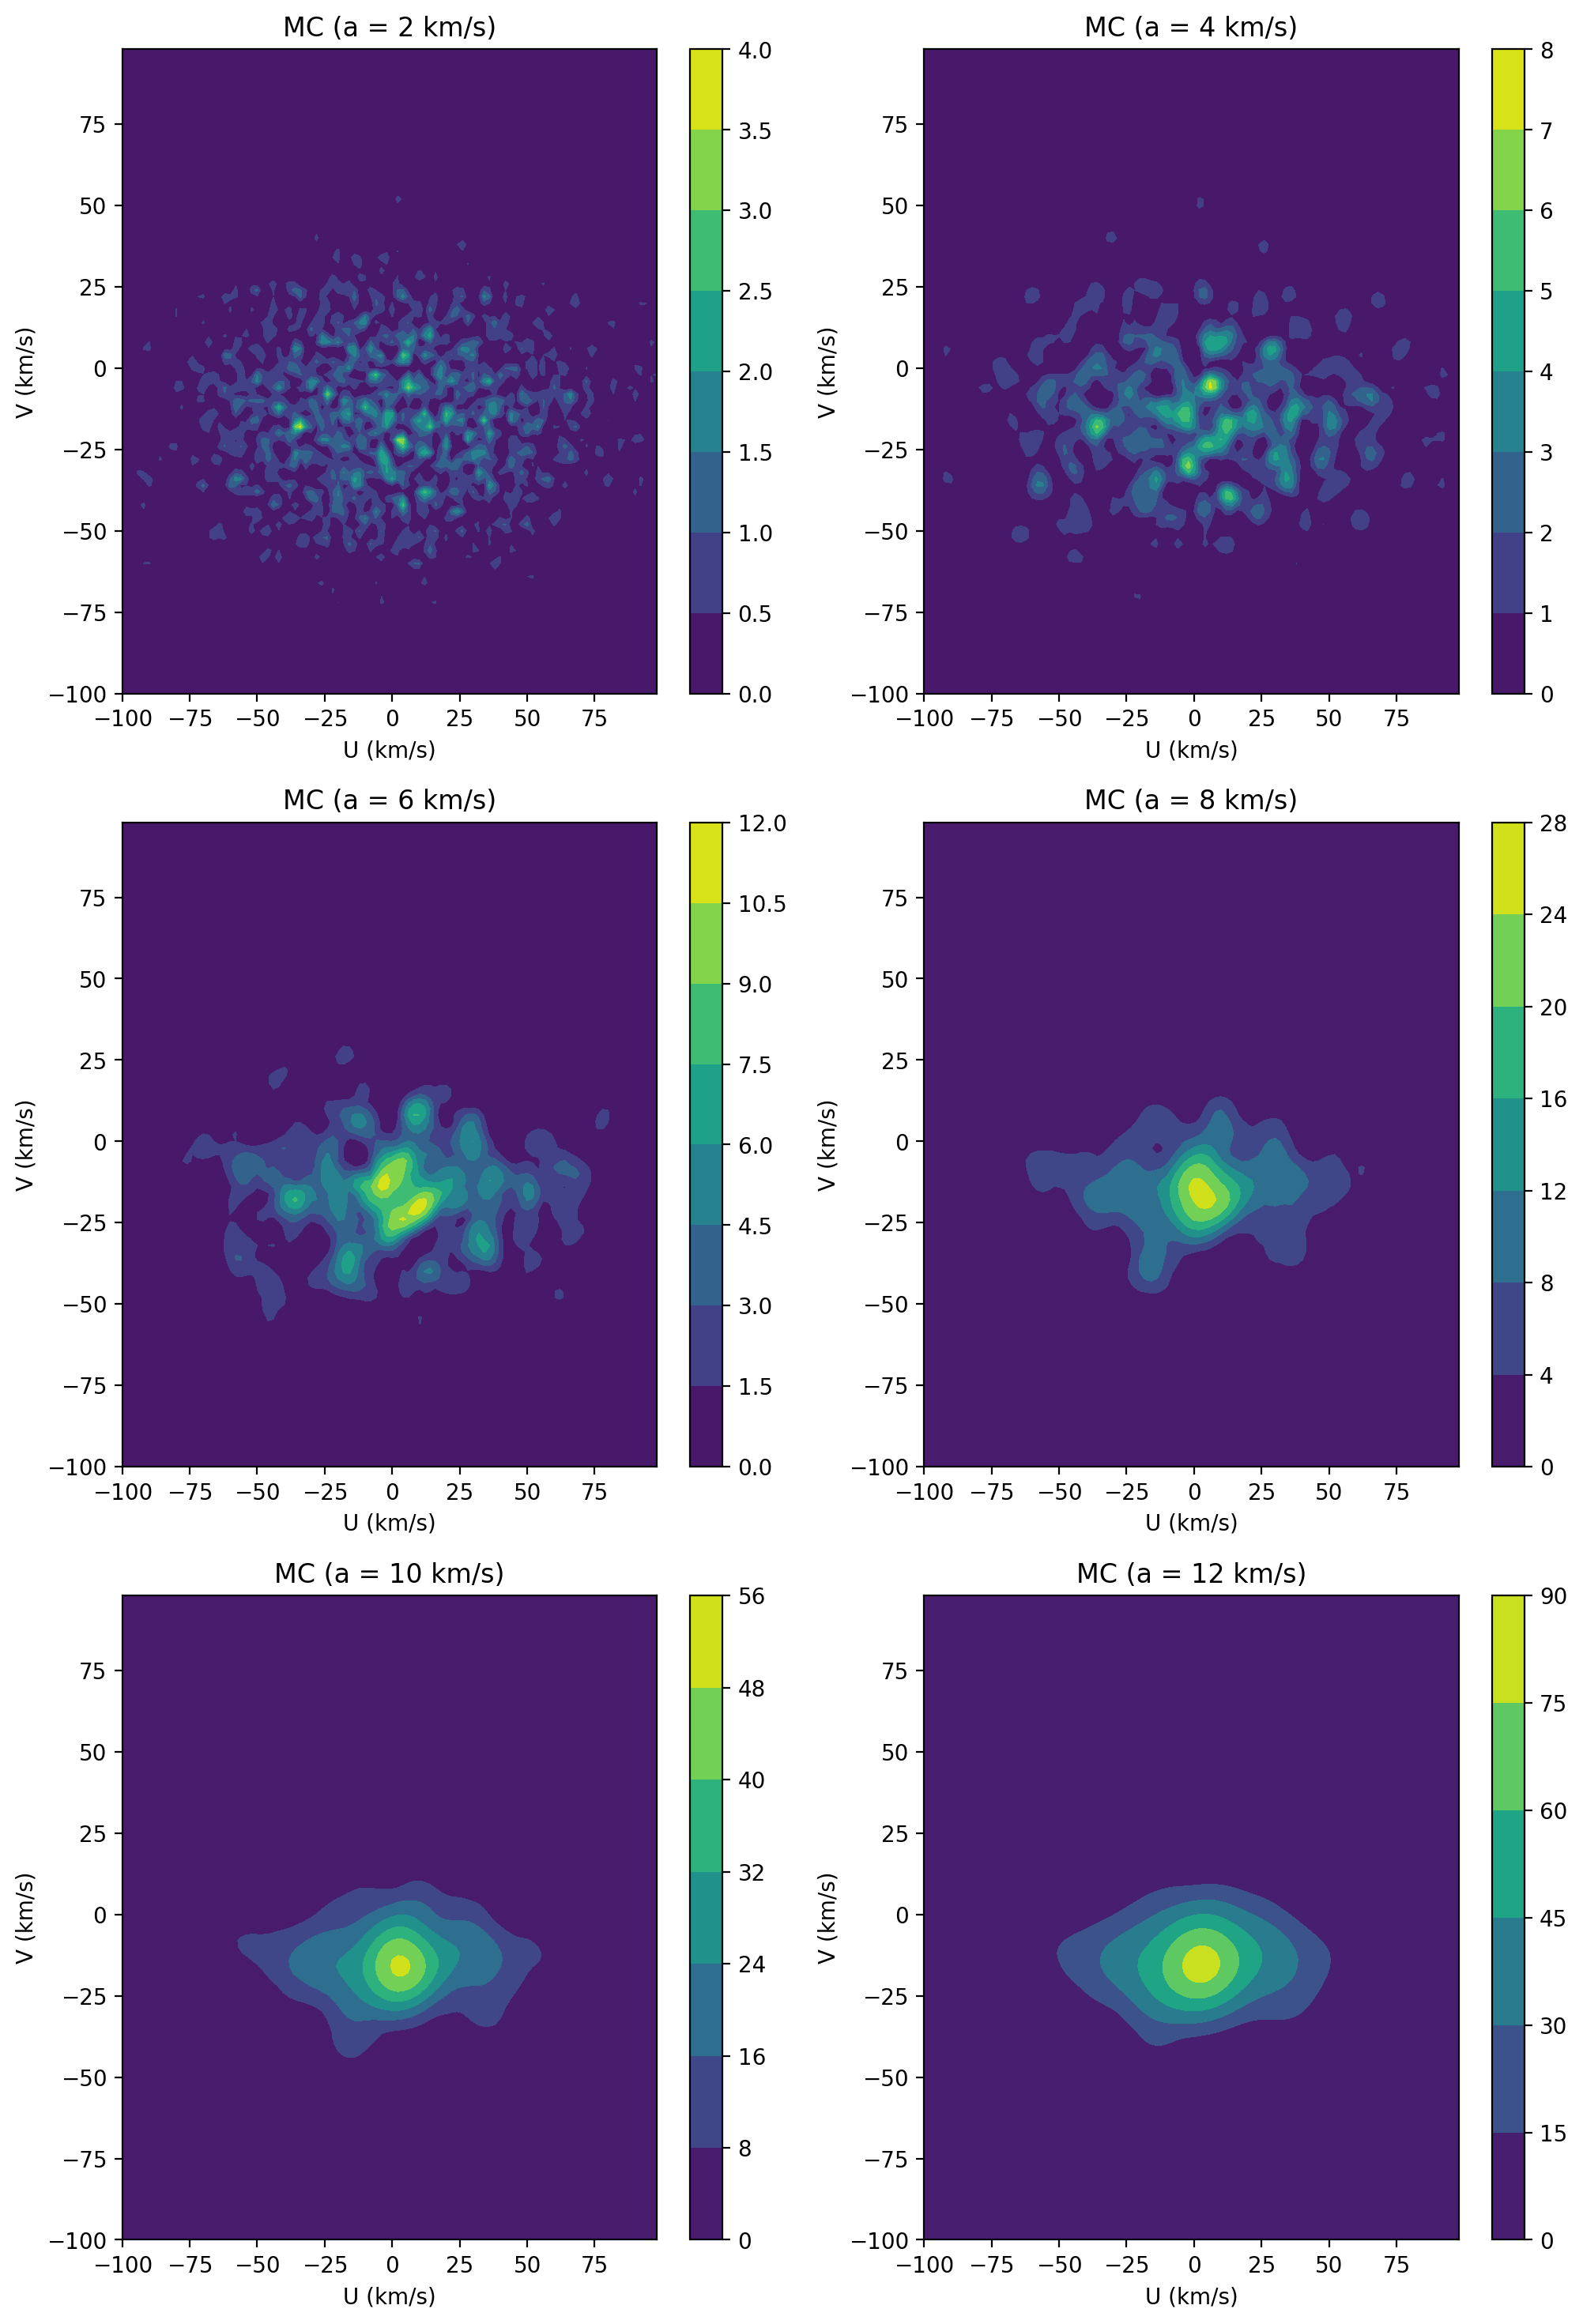

In [14]:
'''PLOT WAVELET KOEF MONTE CARLO'''
plt.figure(dpi=200, figsize=(12,18))

'''
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)'''

plt.subplot(321)
plt.contourf(X,Y,M2,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('MC (a = 2 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,M4,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('MC (a = 4 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,M6,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('MC (a = 6 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,M8,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('MC (a = 8 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,M10,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('MC (a = 10 km/s)', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,M12,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('MC (a = 12 km/s)', fontsize=12)
plt.colorbar()

plt.savefig('THINUVMC.png')
plt.show()

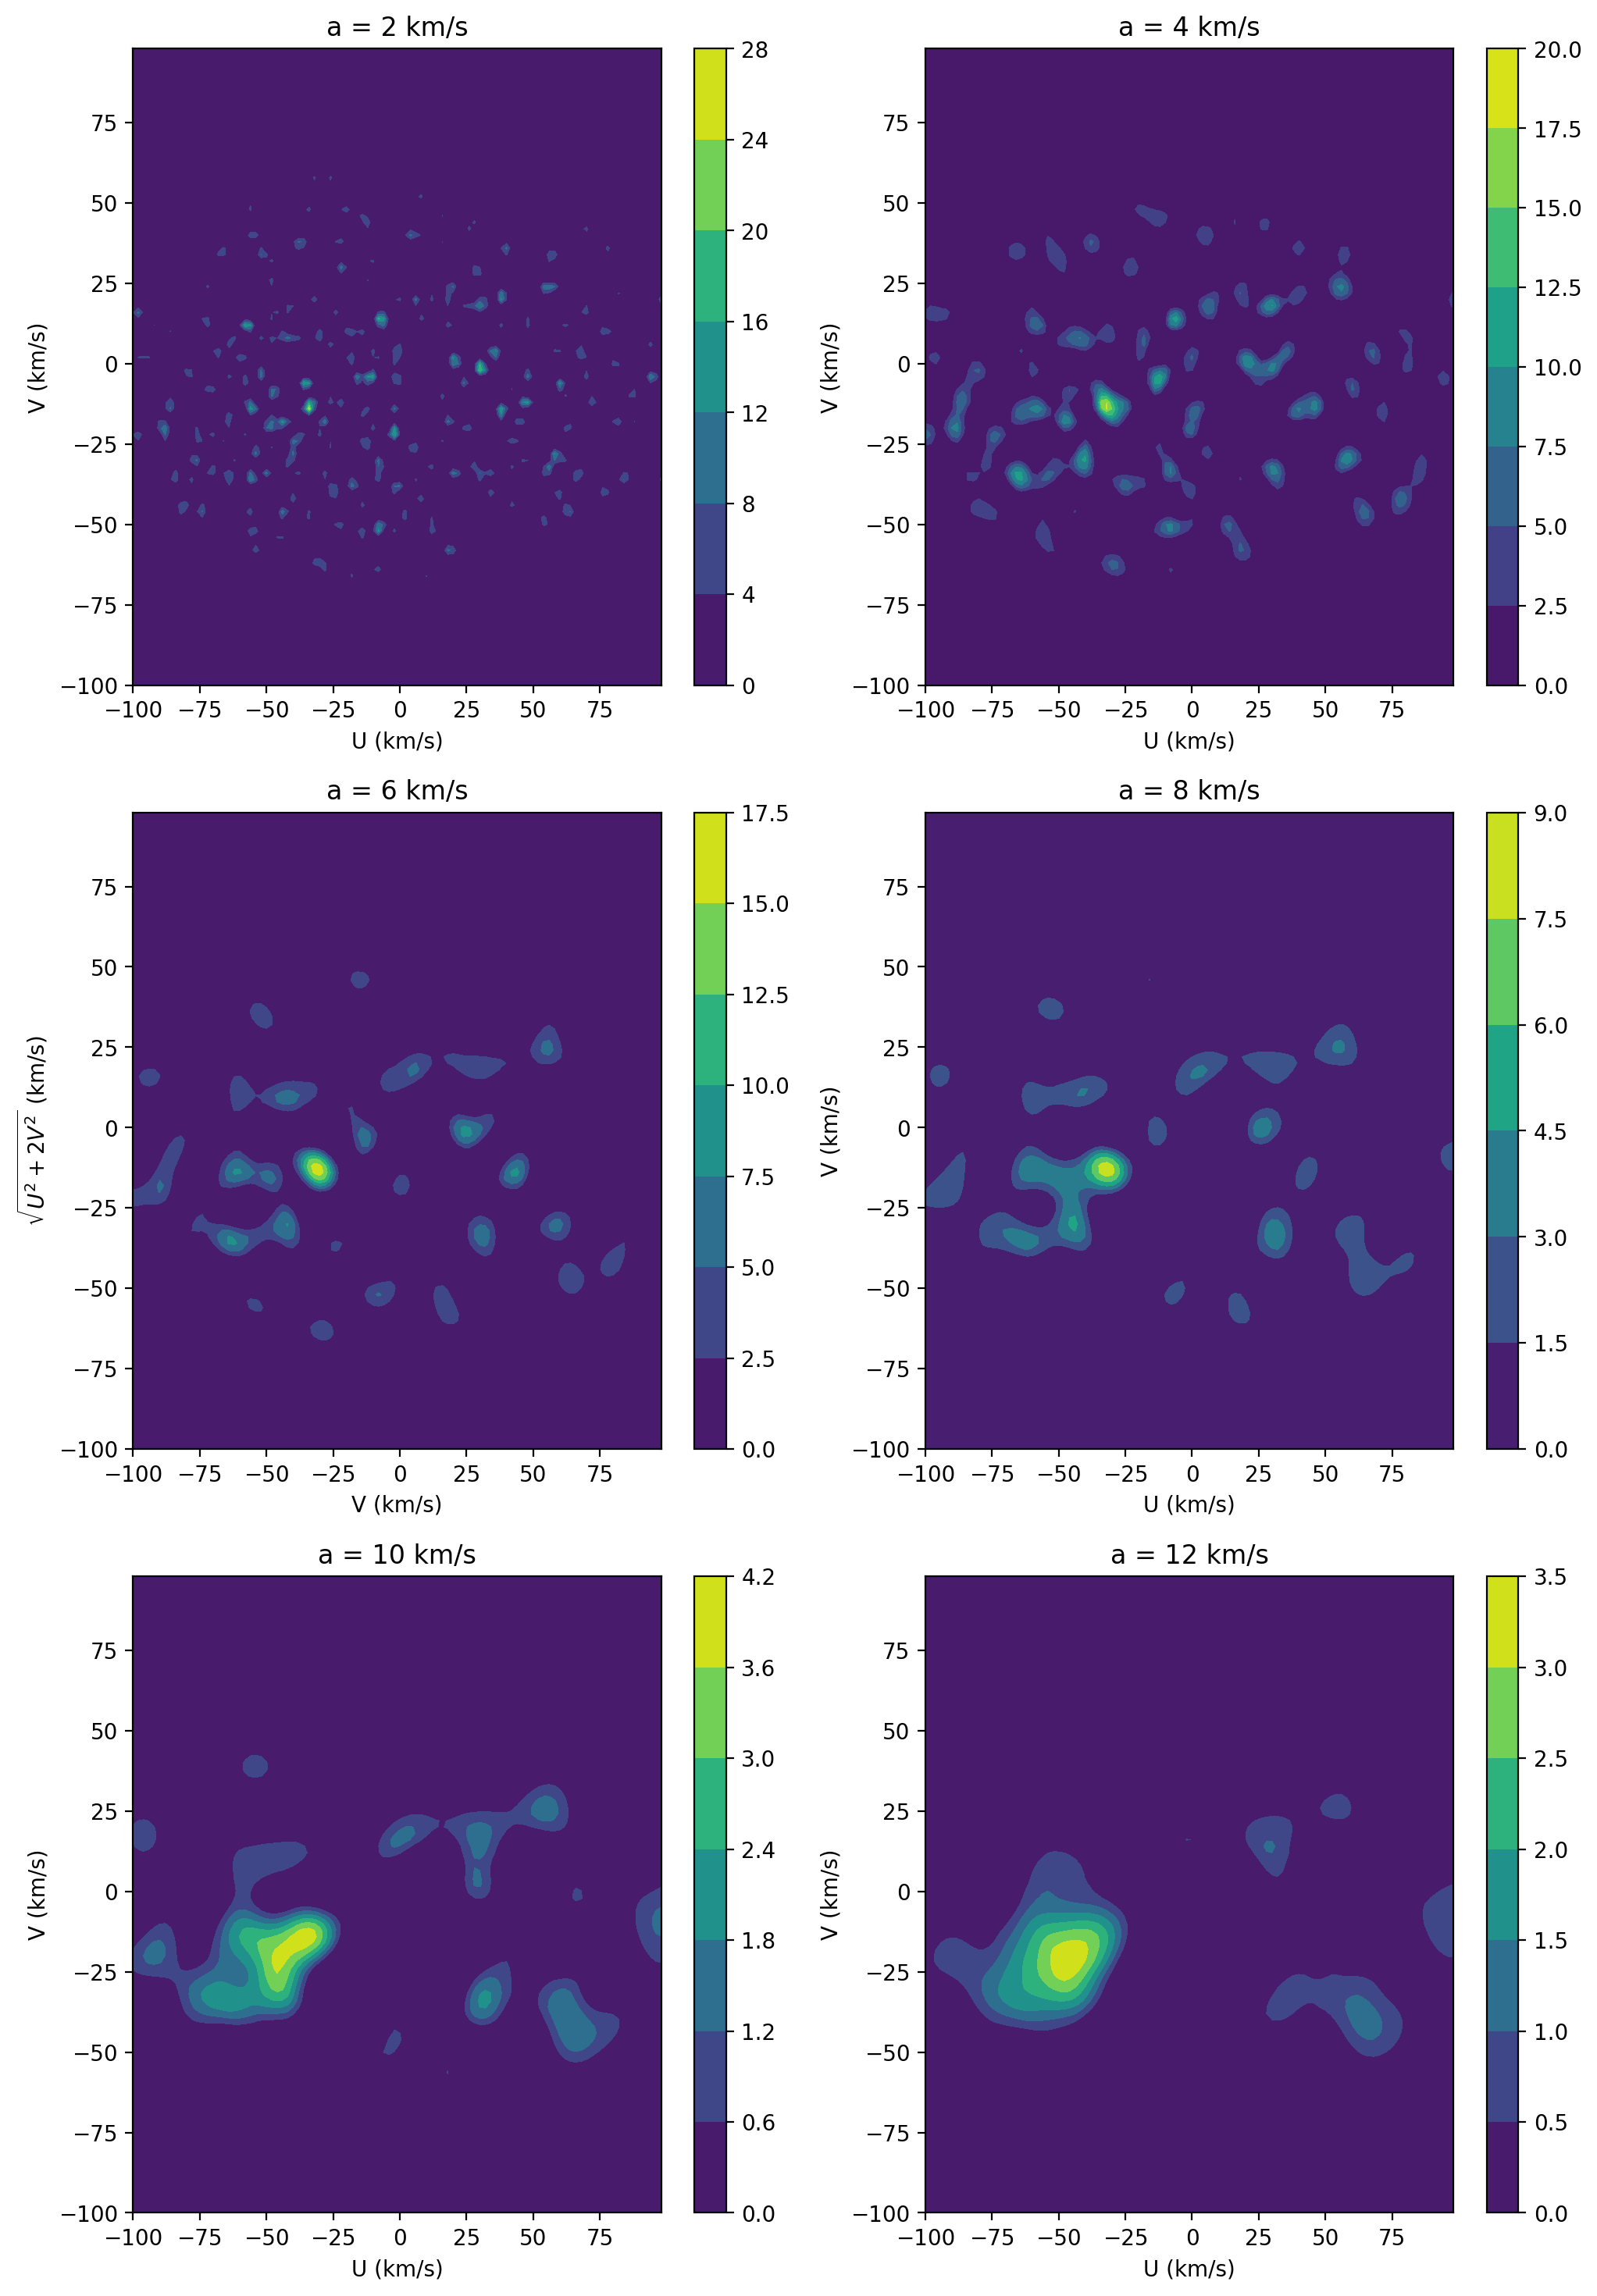

In [15]:
'''PLOT WAVELET SIGNIFIKAN SIGNAL > 0 '''

plt.figure(dpi=200, figsize=(12,18))

plt.subplot(321)
plt.contourf(X,Y,S02,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 2 km/s', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,S04,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 4 km/s', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,S06,cmap='viridis')
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)')
plt.title('a = 6 km/s', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,S08,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 8 km/s', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,S010,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 10 km/s', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,S012,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 12 km/s', fontsize=12)
plt.colorbar()

plt.savefig('TNINUVSIGNAL0.png')
plt.show()

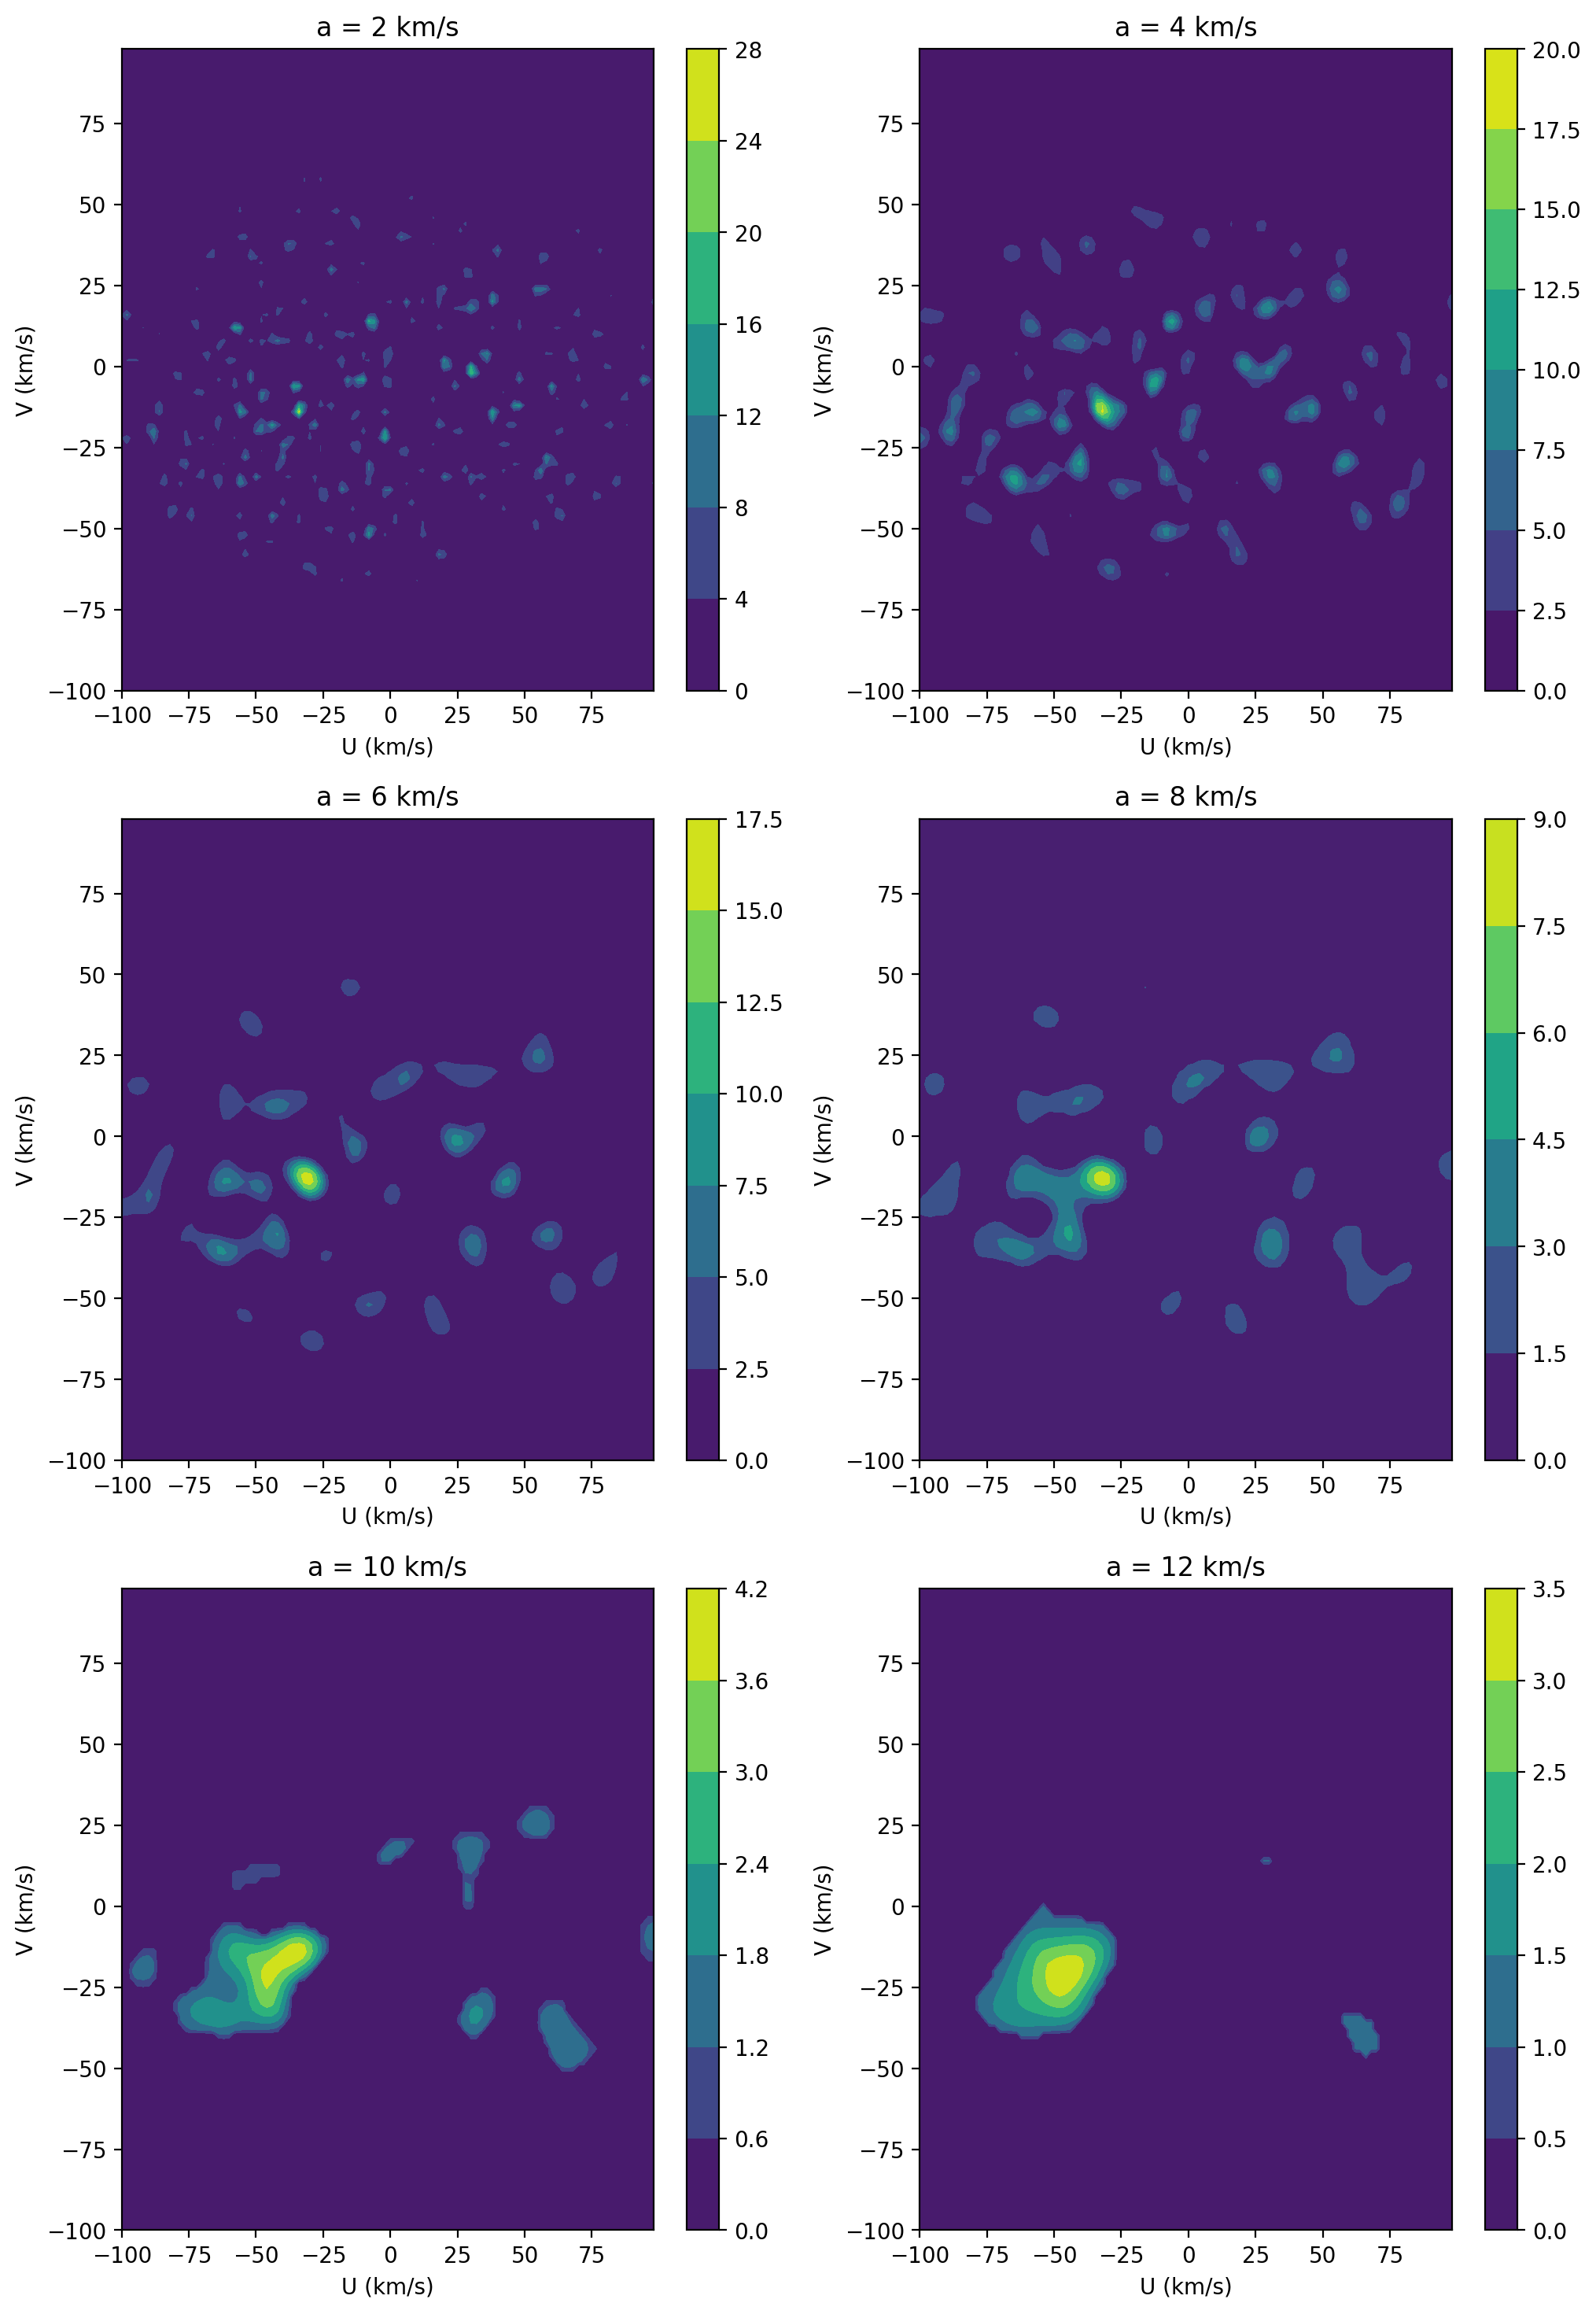

In [16]:
'''PLOT WAVELET SIGNIFIKAN SIGNAL >1'''

plt.figure(dpi=200, figsize=(12,18))

plt.subplot(321)
plt.contourf(X,Y,S12,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 2 km/s', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,S14,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 4 km/s', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,S16,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 6 km/s', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,S18,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 8 km/s', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,S110,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 10 km/s', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,S112,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 12 km/s', fontsize=12)
plt.colorbar()

plt.savefig('THINUVSIGNAL1.png')
plt.show()

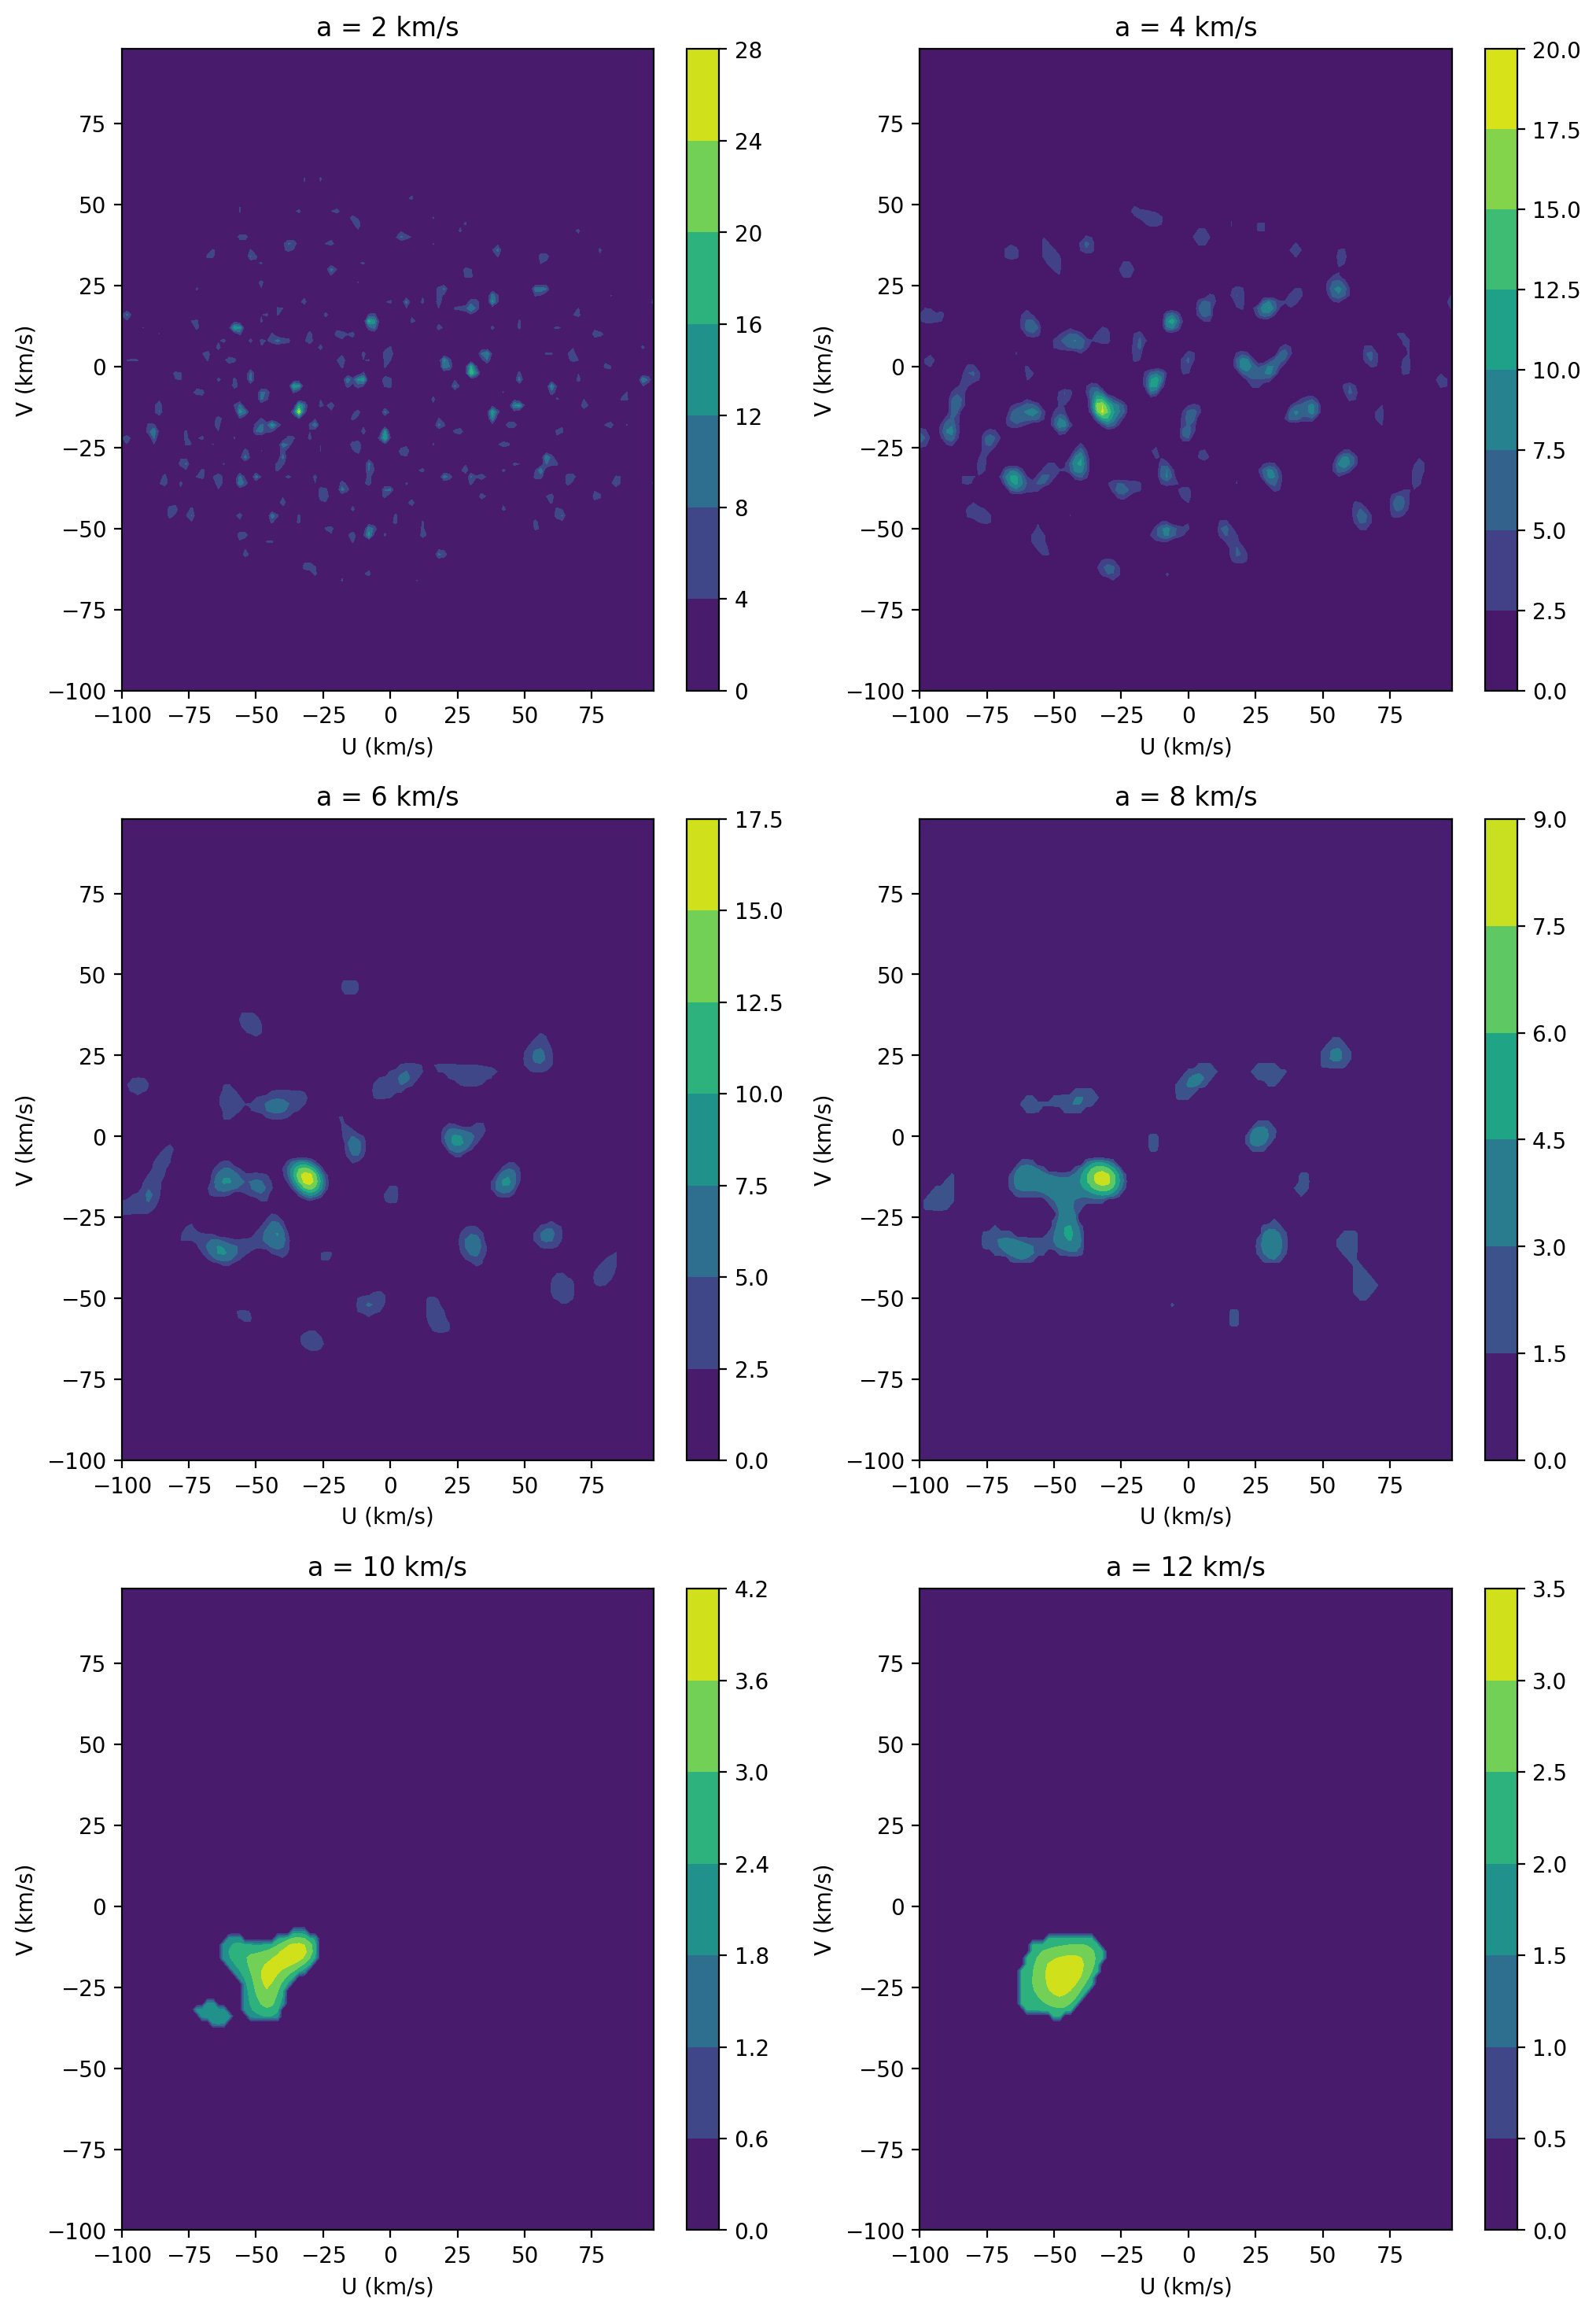

In [17]:
'''PLOT WAVELET SIGNIFIKAN SIGNAL >2'''
plt.figure(dpi=200, figsize=(12,18))

plt.subplot(321)
plt.contourf(X,Y,S22,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 2 km/s', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,S24,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 4 km/s', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,S26,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 6 km/s', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,S28,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 8 km/s', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,S210,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 10 km/s', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,S212,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 12 km/s', fontsize=12)
plt.colorbar()

plt.savefig('THINUVSIGNAL2.png')
plt.show()

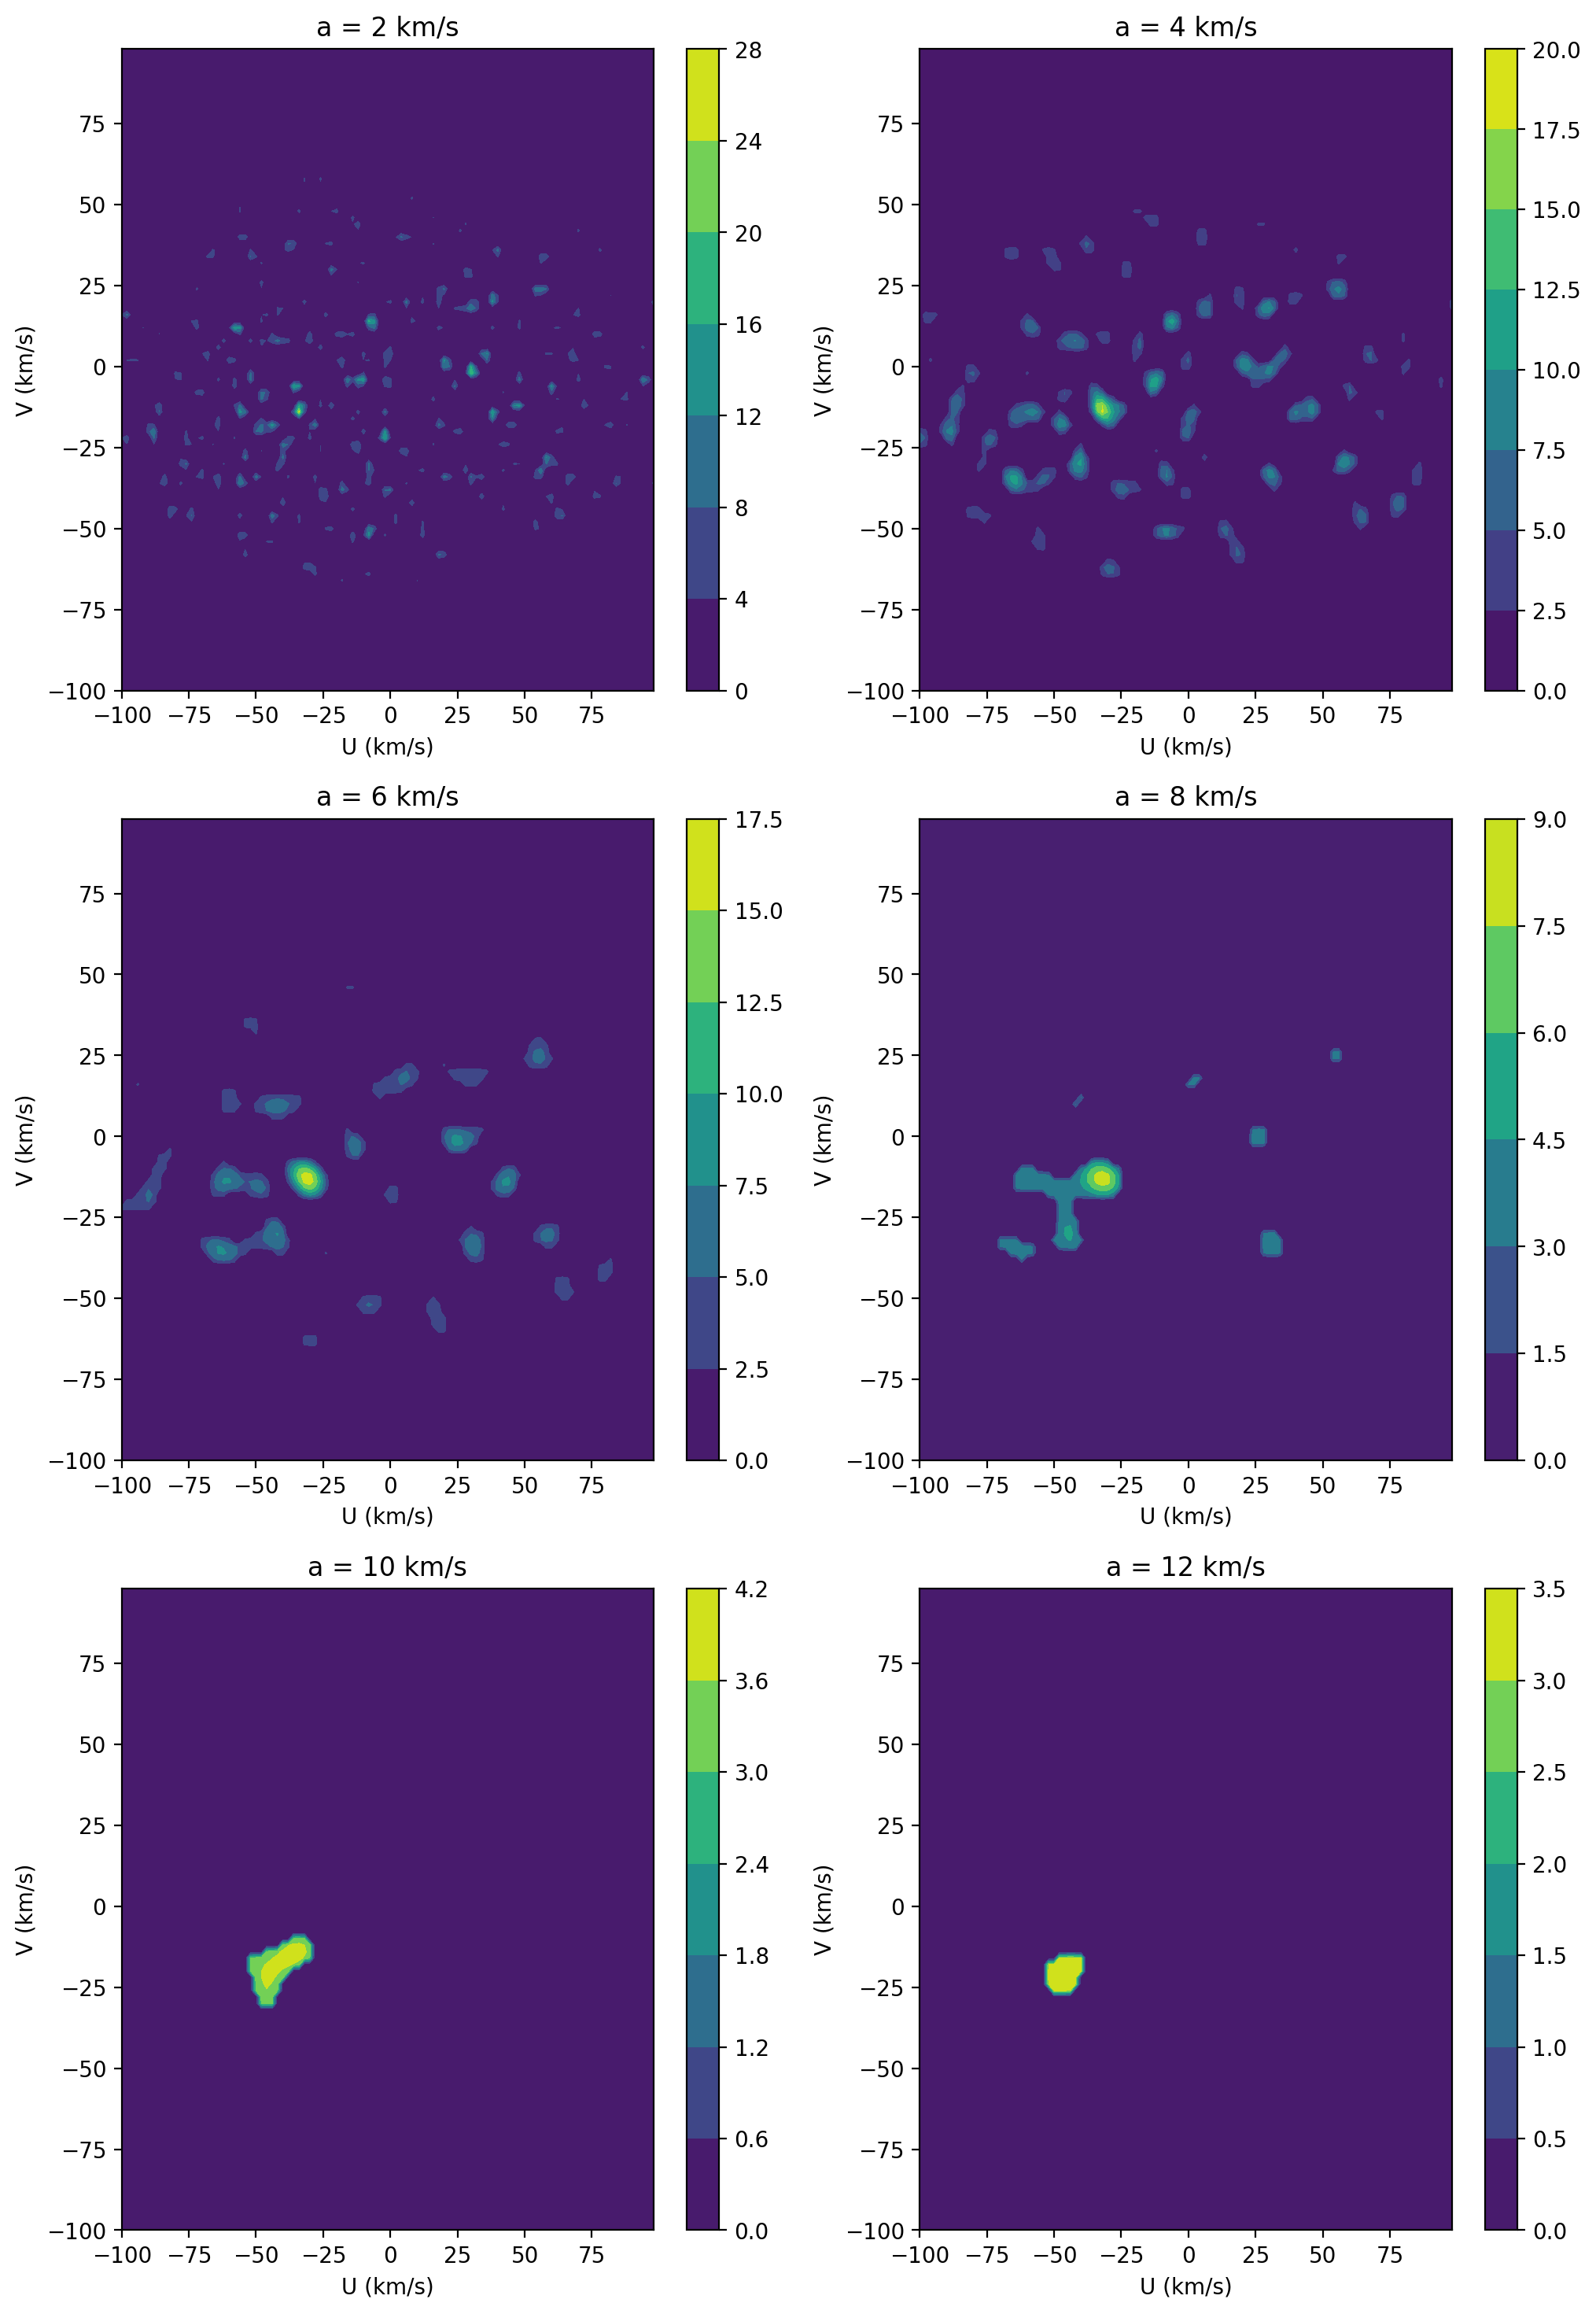

In [18]:
'''PLOT WAVELET SIGNIFIKAN SIGNAL >3'''
plt.figure(dpi=200, figsize=(12,18))

plt.subplot(321)
plt.contourf(X,Y,S32,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 2 km/s', fontsize=12)
plt.colorbar()

plt.subplot(322)
plt.contourf(X,Y,S34,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 4 km/s', fontsize=12)
plt.colorbar()

plt.subplot(323)
plt.contourf(X,Y,S36,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 6 km/s', fontsize=12)
plt.colorbar()

plt.subplot(324)
plt.contourf(X,Y,S38,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 8 km/s', fontsize=12)
plt.colorbar()

plt.subplot(325)
plt.contourf(X,Y,S310,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 10 km/s', fontsize=12)
plt.colorbar()

plt.subplot(326)
plt.contourf(X,Y,S312,cmap='viridis')
plt.xlabel('U (km/s)')
plt.ylabel('V (km/s)')
plt.title('a = 12 km/s', fontsize=12)
plt.colorbar()

plt.savefig('THINUVSIGNAL3.png')
plt.show()

In [19]:
elapsed_time=(time.time()-start_time)/60
print(elapsed_time,'menit')

396.1180441737175 menit
